In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing

In [2]:
#load data
df = pd.read_csv('all_books.csv')
print ("Size of dataset is {}".format(df.shape[0]))
df.head(3)

Size of dataset is 88762


,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,description,num_ratings,num_reviews,average_rating,rating_distribution
0,57896,57896,"Battle Royale, Vol. 14",Battle Royale #14,/series/63912-battle-royale,9875625086,9789875625082,2005.0,NaN,216.0,"['Sequential Art > Manga', 'Sequential Art > G...","{'to-read': 285, 'manga': 220, 'mangá': 33, 'g...","The beginning of the end!Shuuya, Kawada, and N...",1377,29,4.17,"{'5 Stars': 592, '4 Stars': 509, '3 Stars': 21..."
1,66332,66332,The Evolving Self: A Psychology for the Third ...,NaN,NaN,0060166770,9780060166779,1993.0,NaN,384.0,"['Psychology', 'Nonfiction', 'Philosophy', 'Sc...","{'to-read': 2340, 'currently-reading': 202, 'p...",The author of the bestselling Flow (more than ...,916,69,4.06,"{'5 Stars': 366, '4 Stars': 319, '3 Stars': 17..."
2,30552,30552,Inside George Orwell: A Biography,NaN,NaN,0349115516,9780349115511,2003.0,NaN,512.0,"['Biography', 'Nonfiction', 'History', 'Litera...","{'to-read': 312, 'biography': 26, 'currently-r...","Big Brother, Newspeak, Room 101, Doublethink. ...",189,22,3.88,"{'5 Stars': 49, '4 Stars': 85, '3 Stars': 43, ..."


In [3]:
#check genres distributions and remove empty rows
df = df.dropna(subset=['genres','description','book_title']).reset_index(drop=True)
df['genres'] = df['genres'].str.replace('[','').str.replace(']','').str.replace("'",'')
df = df[df['genres'].map(lambda d: len(d)) > 0].reset_index(drop = True)
all_genres = set()
df['original_label'] = [-1 for _ in range(len(df))]
for i in range(len(df)):
    g = df['genres'][i].split(',')
    for ele in g:
        ele = ele.split('>')[0].lstrip().rstrip()
        all_genres.add(ele)
print ('There are total of {} genres'.format(len(all_genres)))

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


There are total of 340 genres


In [11]:
df.head(3)

,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,description,num_ratings,num_reviews,average_rating,rating_distribution,original_label
0,57896,57896,"Battle Royale, Vol. 14",Battle Royale #14,/series/63912-battle-royale,9875625086,9789875625082,2005.0,NaN,216.0,"Sequential Art > Manga, Sequential Art > Graph...","{'to-read': 285, 'manga': 220, 'mangá': 33, 'g...","The beginning of the end!Shuuya, Kawada, and N...",1377,29,4.17,"{'5 Stars': 592, '4 Stars': 509, '3 Stars': 21...",-1
1,66332,66332,The Evolving Self: A Psychology for the Third ...,NaN,NaN,0060166770,9780060166779,1993.0,NaN,384.0,"Psychology, Nonfiction, Philosophy, Science, S...","{'to-read': 2340, 'currently-reading': 202, 'p...",The author of the bestselling Flow (more than ...,916,69,4.06,"{'5 Stars': 366, '4 Stars': 319, '3 Stars': 17...",-1
2,30552,30552,Inside George Orwell: A Biography,NaN,NaN,0349115516,9780349115511,2003.0,NaN,512.0,"Biography, Nonfiction, History, Literature","{'to-read': 312, 'biography': 26, 'currently-r...","Big Brother, Newspeak, Room 101, Doublethink. ...",189,22,3.88,"{'5 Stars': 49, '4 Stars': 85, '3 Stars': 43, ...",-1


In [5]:
#clean up genres: take the first genres as the label, clean up text 
def get_first(genres):
    clean_genres = []
    for genre in genres:
        g = genre.split('>')[0].lstrip().rstrip()
        clean_genres.append(g)
    return clean_genres
df['original_label'] = df['genres'].apply(lambda x:x.split(','))
df['original_label'] = df['original_label'].apply(get_first)
#df['original_label'][i] = df['original_label'][i].apply(lambda x:x.split('>')[0].lstrip().rstrip())
df['label'] = df['original_label']

#combine book title and description together as the training data
# disable chained assignments
pd.options.mode.chained_assignment = None 
df['book'] = (df['book_title'].astype(str) +' ' + df['description']).apply(lambda row:row.strip())

In [6]:
df = df[['book','label']]

In [7]:
all_genres = {}
for label in df['label']:
    for l in label:
        if l in all_genres:
            all_genres[l] += 1
        else:
            all_genres[l] = 1

top_20 = {k: v for k, v in sorted(all_genres.items(), key=lambda item: -1*item[1])}
top_20 = {A:N for (A,N) in [x for x in top_20.items()][:20]}

In [8]:
top_20

{'Fiction': 31313,
 'Literature': 24816,
 'Nonfiction': 20540,
 'Fantasy': 19922,
 'Historical': 16222,
 'Classics': 15903,
 'Mystery': 14536,
 'Childrens': 13381,
 'Cultural': 12702,
 'Novels': 11407,
 'History': 10993,
 'Romance': 8887,
 'European Literature': 8536,
 'Religion': 8470,
 'Thriller': 8406,
 'Young Adult': 7948,
 'Science Fiction': 7866,
 'Biography': 7493,
 'Philosophy': 6837,
 'Humor': 6638}

In [9]:
genres = ['Literature','Fiction','Classics','Nonfiction','Historical','Novels','Fantasy','Childrens','Cultural','Mystery',
         'History','Biography','Religion','European Literature','Thriller','Romance','Humor','Contemporary','Young Adult',
         'Philosophy']
for g in genres:
    df['genres_{}'.format(g)] = df['label'].apply(lambda x: g in x)

In [10]:
df['label'][0]

['Sequential Art',
 'Sequential Art',
 'Sequential Art',
 'Horror',
 'Science Fiction',
 'Thriller',
 'Manga',
 'Fiction',
 'Comics Manga',
 'Asian Literature']

In [11]:
#encode genres to get labels
all_genres = list(all_genres)
le = preprocessing.LabelEncoder()
le.fit(all_genres)
le.classes_

array(['40k', 'Academic', 'Action', 'Adolescence', 'Adult',
       'Adult Fiction', 'Adventure', 'Aeroplanes', 'Africa',
       'African Literature', 'Alcohol', 'American', 'American Civil War',
       'American History', 'American Revolution', 'Amish', 'Anarchism',
       'Animals', 'Anthologies', 'Anthropology', 'Apocalyptic',
       'Archaeology', 'Architecture', 'Arithmetic', 'Art',
       'Art and Photography', 'Artificial Intelligence',
       'Asian Literature', 'Astronomy', 'Audiobook',
       'Autistic Spectrum...', 'Autobiography', 'Aviation', 'Banking',
       'Beer', 'Biblical', 'Biblical Fiction', 'Biography',
       'Biography Memoir', 'Biology', 'Book Club', 'Buddhism', 'Buisness',
       'Business', 'Canon', 'Cartography', 'Category Romance',
       'Central Africa', 'Childrens', 'Christian', 'Christian Fiction',
       'Christianity', 'Church', 'Cities', 'Civil War', 'Classics',
       'Colouring', 'Colouring Books', 'Combat', 'Comedy', 'Comics',
       'Comics Bd', 'C

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


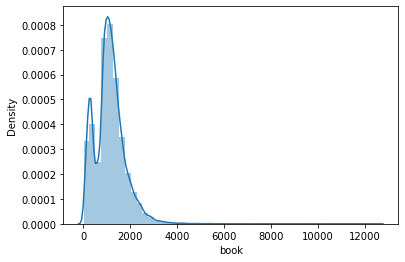

In [12]:
#check distribution of book length
length_dist = df['book'].apply(len)
ax = sns.distplot(length_dist)

In [13]:
#save files
df.to_csv("final_df.csv")